# PyTorch tutorial

In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt

Following the notes in https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [6]:
# create input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# randomly initialize weights
a = np.random.randn()
b = np.random.rand()
c = np.random.rand()
d = np.random.rand()

learning_rate = 1e-6
for t in range(2000):
    # forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b*x + c*x**2 + d*x**3

    # compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backdrop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred*x).sum()
    grad_c = (grad_y_pred*x**2).sum()
    grad_d = (grad_y_pred*x**3).sum()

    # Update weights using gradient descent

    a -= learning_rate* grad_a
    b -= learning_rate* grad_b
    c -= learning_rate* grad_c
    d -= learning_rate* grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 155.86019615692248
199 112.37896049592605
299 81.77686223121123
399 60.2316759150956
499 45.05821302696937
599 34.36897107603874
699 26.83663720490835
799 21.52747823374791
899 17.78440078165963
999 15.144834625164481
1099 13.283043299088254
1199 11.96957819474251
1299 11.042770069653486
1399 10.388676555498202
1499 9.926972375454886
1599 9.601017692762428
1699 9.370865111077329
1799 9.208334308286368
1899 9.093541960540591
1999 9.012456298401268
Result: y = 0.014635610497308733 + 0.8547705504257286 x + -0.002524886348395648 x^2 + -0.09305013206887222 x^3


We will be fitting $$y = \sin(x) $$

# Warm-up: numpy

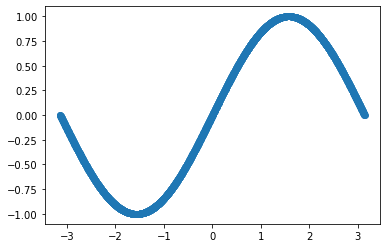

In [12]:
y_pred_1 = 0.014635610497308733 + 0.8547705504257286 *x + -0.002524886348395648 * x**2 + -0.09305013206887222 * x**3
plt.scatter(x,y)
plt.show()

# PyTorch tensors

Same exercise as above but using torch tensors over numpy arrays.

In [1]:
import torch
import math

In [2]:
dtype = torch.float
device = torch.device('cpu')
# device = torch.device('cuda:0') # uncomment this to run on GPU

In [9]:
# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# # Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item() # .item() gets the value of a tensor when that value is one mumber
    if t % 100 == 99:
        print(t, loss)
    
    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 137.2635040283203
199 97.02774047851562
299 69.46418762207031
399 50.560325622558594
499 37.58055114746094
599 28.65835952758789
699 22.5184268951416
799 18.288480758666992
899 15.371153831481934
999 13.356989860534668
1099 11.964882850646973
1199 11.001758575439453
1299 10.334733009338379
1399 9.872319221496582
1499 9.551429748535156
1599 9.328571319580078
1699 9.173638343811035
1799 9.065837860107422
1899 8.990768432617188
1999 8.938448905944824
Result: y = 0.010527896694839 + 0.8521446585655212 x + -0.0018162386259064078 x^2 + -0.09267661720514297 x^3


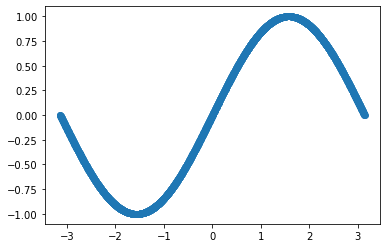

In [12]:
y_pred_2 = 0.010527896694839 + 0.8521446585655212 * x + -0.0018162386259064078 * x**2 + -0.09267661720514297 * x**3
plt.scatter(x,y)
plt.show()

# Using autograd

In [18]:
import torch
import math

dtype = float
device = torch.device('cpu')
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# initialize coefficients
a = torch.randn((),device=device, dtype=dtype, requires_grad=True)
b = torch.randn((),device=device, dtype=dtype, requires_grad=True)
c = torch.randn((),device=device, dtype=dtype, requires_grad=True)
d = torch.randn((),device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())
    
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.

    with torch.no_grad():
        a-= learning_rate * a.grad
        b-= learning_rate * b.grad
        c-= learning_rate * c.grad
        d-= learning_rate * d.grad

        # zero out the gradients

        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 988.514818693963
199 692.2041522198767
299 485.8729552985514
399 342.0792455850753
499 241.78929444103213
599 171.7882590907716
699 122.89285884296437
799 88.71576718302403
899 64.81053665066
999 48.079268743707686
1099 36.36189147615424
1199 28.151092473031362
1299 22.394281638148453
1399 18.3558901788618
1499 15.521540024562858
1599 13.531296229608298
1699 12.13313851752612
1799 11.15050190772146
1899 10.459615297617706
1999 9.973669072376543
Result: y = 0.03469012602707873 + 0.8479157833418705 x + -0.005984623985859814 x^2 + -0.09207510114303036 x^3


# nn

In [19]:
import torch
import math

# data
x = torch.linspace(-math.pi, math.pi,2000)
y = torch.sin(x)

For this example, the output y is a linear function of (x, x^2, x^3), so we can consider it as a linear layer neural network. Let's prepare the tensor (x, x^2, x^3).

In [25]:
p = torch.tensor([1,2,3])
xx = x.unsqueeze(-1).pow(p)

In [28]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3,1),
    torch.nn.Flatten(0,1)
)

In [29]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [33]:
learning_rate = 1e-6

for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())
    # zero the gradients before running the backward pass
    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 1192.713623046875
199 799.1564331054688
299 536.7277221679688
399 361.6478271484375
499 244.7799835205078
599 166.72540283203125
699 114.5625
799 79.68145751953125
899 56.3416748046875
999 40.71360397338867
1099 30.241975784301758
1199 23.220142364501953
1299 18.507984161376953
1399 15.343311309814453
1499 13.216157913208008
1599 11.785127639770508
1699 10.821588516235352
1799 10.172204971313477
1899 9.734131813049316
1999 9.43834114074707


In [36]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

In [35]:
linear_layer

Linear(in_features=3, out_features=1, bias=True)

In [37]:
# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.01591726392507553 + 0.8374199867248535 x + -0.0027459922712296247 x^2 + -0.09058216214179993 x^3


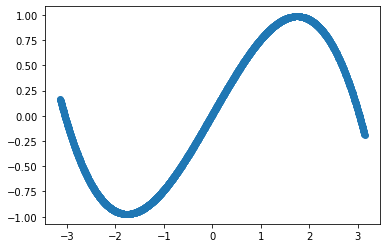

In [40]:
y3 = 0.01591726392507553 + 0.8374199867248535*x + -0.0027459922712296247 * x**2 + -0.09058216214179993 * x**3
plt.scatter(x,y3)
plt.show()

# PyTorch: optim

In [46]:
import torch
import math

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).

p = torch.tensor([1,2,3])
xx = x.unsqueeze(-1).pow(p)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()
    loss.backward()
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    

In [47]:
linear_layer = model[0]

print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.0004965192056261003 + 0.8562438488006592 x + 0.0004965385305695236 x^2 + -0.09382755309343338 x^3
